In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

(516, 516, 3)


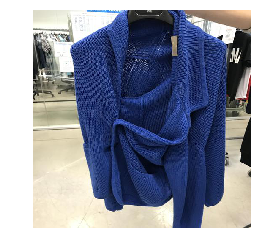

In [4]:
InteractiveShell.ast_node_interactivity = "none"
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

img = cv2.imread('../data/example_mobile_image.jpg')

###
# OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. 
# When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
# The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB
###

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
print(img.shape)

## Method 1: `grabcut`
ref: https://docs.opencv.org/trunk/d8/d83/tutorial_py_grabcut.html

In [7]:
InteractiveShell.ast_node_interactivity = "none"

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img = cv2.imread('../data/example_mobile_image.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (10,10,516-20,516-20) #(start_x, start_y, width, height)

_ = cv2.grabCut(img,mask,rect,bgdModel,fgdModel,3,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2_black = img*mask2[:,:,np.newaxis]

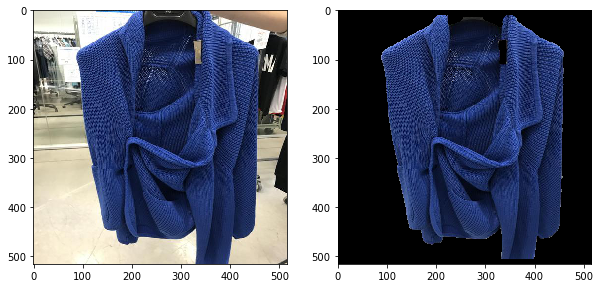

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(img2_black)

## Black background to white background

In [11]:
#Get the background
background = img - img2_black
#Change all pixels in the background that are not black to white 
background[np.where((background > [0,0,0]).all(axis = 2))] =[255,255,255] 
#Add the background and the image 
img2_white = background + img2_black

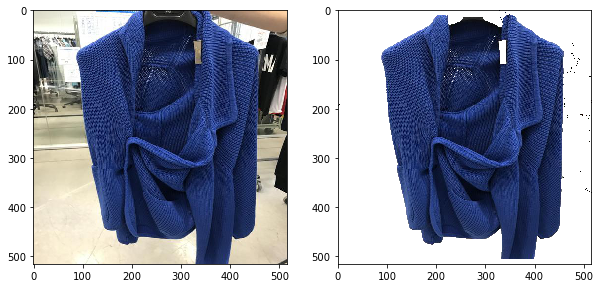

In [14]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(img2_white)

## Visual result on a catalogue image
- code to do `grabcut` and convert background to white, all in one cell

In [17]:
InteractiveShell.ast_node_interactivity = "none"

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

img = cv2.imread('../data/example_catalogue_image2.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (10,10,516-20,516-20) #(start_x, start_y, width, height)

_ = cv2.grabCut(img,mask,rect,bgdModel,fgdModel,3,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2_black = img*mask2[:,:,np.newaxis]

#Get the background
background = img - img2_black
#Change all pixels in the background that are not black to white 
background[np.where((background > [0,0,0]).all(axis = 2))] =[255,255,255] 
#Add the background and the image 
img2_white = background + img2_black

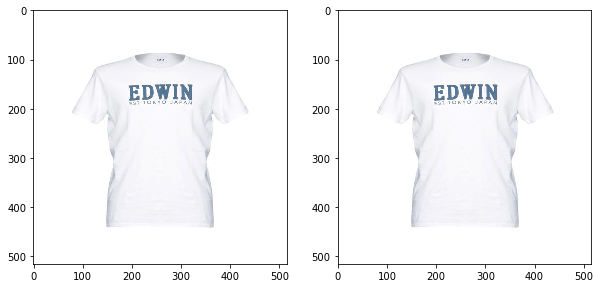

In [18]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plt.imshow(img2_white)

## Method 2: `Gaussian` Smoothing + `Otsu` Thresholding

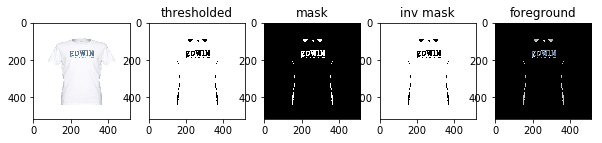

In [20]:
InteractiveShell.ast_node_interactivity = "none"

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

foreground_path = '../data/example_catalogue_image2.jpg'
foreground = cv2.imread(foreground_path)
foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)

# RGB to gray scale
gray = cv2.cvtColor(foreground,cv2.COLOR_BGR2GRAY)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(gray,(5,5),0)
ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # a height x width, 2D

# positive mask
mask_bool = thresh == 255
mask_bool = np.dstack((mask_bool, mask_bool, mask_bool))

# negative mask
mask_bool_inv = np.invert(mask_bool)

plt.figure(figsize=(10,10))
# original
plt.subplot(1,5,1)
plt.imshow(foreground)

# invert thresh for visualisation only
plt.subplot(1,5,2)
plt.imshow((np.invert(thresh)).astype('uint8')*255, cmap='binary')
plt.title('thresholded')

# invert mask_bool for visualisation only
plt.subplot(1,5,3)
plt.imshow((np.invert(mask_bool)).astype('uint8')*255, cmap='binary')
plt.title('mask')

# invert mask_bool_inv for visualisation only
plt.subplot(1,5,4)
plt.imshow((np.invert(mask_bool_inv)).astype('uint8')*255, cmap='binary')
plt.title('inv mask')

fg = foreground * mask_bool_inv
plt.subplot(1,5,5)
plt.imshow(fg)
plt.title('foreground')

In [21]:
InteractiveShell.ast_node_interactivity = "none"

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

def otsu_mask(foreground_path):
    
    foreground = cv2.imread(foreground_path)
    foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)

    # RGB to gray scale
    gray = cv2.cvtColor(foreground,cv2.COLOR_BGR2GRAY)

    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(gray,(5,5),0)
    ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # a height x width, 2D

    # positive mask
    mask_bool = thresh == 255
    mask_bool = np.dstack((mask_bool, mask_bool, mask_bool))

    # negative mask
    mask_bool_inv = np.invert(mask_bool)

    return mask_bool, mask_bool_inv

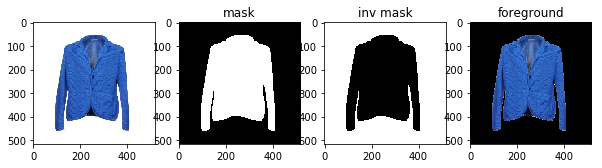

In [24]:
foreground_path = '../data/example_catalogue_image.jpg'

mask_bool, mask_bool_inv = otsu_mask(foreground_path)

plt.figure(figsize=(10,10))

# original
foreground = cv2.imread(foreground_path)
foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
plt.subplot(1,4,1)
plt.imshow(foreground)

# invert mask_bool for visualisation only
plt.subplot(1,4,2)
plt.imshow((np.invert(mask_bool)).astype('uint8')*255, cmap='binary')
plt.title('mask')

# invert mask_bool_inv for visualisation only
plt.subplot(1,4,3)
plt.imshow((np.invert(mask_bool_inv)).astype('uint8')*255, cmap='binary')
plt.title('inv mask')

fg = foreground * mask_bool_inv
plt.subplot(1,4,4)
plt.imshow(fg)
plt.title('foreground')

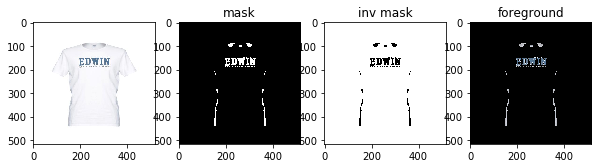

In [23]:
foreground_path = '../data/example_catalogue_image2.jpg'

mask_bool, mask_bool_inv = otsu_mask(foreground_path)

plt.figure(figsize=(10,10))

# original
foreground = cv2.imread(foreground_path)
foreground = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
plt.subplot(1,4,1)
plt.imshow(foreground)

# invert mask_bool for visualisation only
plt.subplot(1,4,2)
plt.imshow((np.invert(mask_bool)).astype('uint8')*255, cmap='binary')
plt.title('mask')

# invert mask_bool_inv for visualisation only
plt.subplot(1,4,3)
plt.imshow((np.invert(mask_bool_inv)).astype('uint8')*255, cmap='binary')
plt.title('inv mask')

fg = foreground * mask_bool_inv
plt.subplot(1,4,4)
plt.imshow(fg)
plt.title('foreground')